# Plot the eigenvalues of the two particle hamiltonian and von Neumann entropy

<>:70: SyntaxWarning: invalid escape sequence '\l'
<>:77: SyntaxWarning: invalid escape sequence '\l'
<>:70: SyntaxWarning: invalid escape sequence '\l'
<>:77: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Markus\AppData\Local\Temp\ipykernel_7476\1473392727.py:70: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize = 12)
C:\Users\Markus\AppData\Local\Temp\ipykernel_7476\1473392727.py:77: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize = 12)
c:\Users\Markus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\linalg\_matfuncs.py:204: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)
C:\Users\Markus\AppData\Local\Temp\ipykernel_7476\1473392727.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Dep

Density Matrix [[ 9.99999995e-01 -0.00000000e+00 -0.00000000e+00 -7.14464323e-05]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.14464323e-05  0.00000000e+00  0.00000000e+00  5.10459272e-09]]
Eigenvectors [[-9.99999997e-01  0.00000000e+00  0.00000000e+00  7.14464325e-05]
 [ 0.00000000e+00 -9.99999992e-01  1.25031255e-04  0.00000000e+00]
 [ 0.00000000e+00  1.25031255e-04  9.99999992e-01  0.00000000e+00]
 [ 7.14464325e-05  0.00000000e+00  0.00000000e+00  9.99999997e-01]]

Eigvalues:  [8.29060927 1.10999088 1.1455597  5.45384015]
Eigvecotrs:  [[-1.12146329e-01  9.93691703e-01  2.79037075e-15  2.43027844e-17]
 [ 3.88334245e-16 -2.01557281e-14  9.81948233e-01  1.89149856e-01]
 [ 1.12448439e-16  3.90367273e-15 -1.89149856e-01  9.81948233e-01]
 [-9.93691703e-01 -1.12146329e-01 -1.63664233e-16  1.34427181e-16]]

Eigvalues:  [1.11062957 8.29147096 5.4532758  1.14462368]
Eigvecotrs:  [[-0.99368409  0.1122

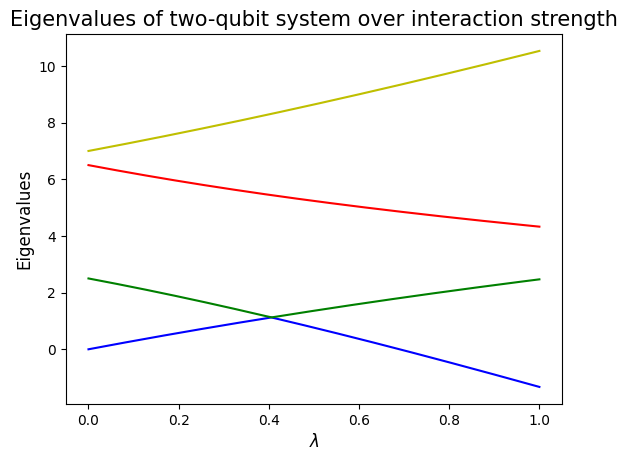

<function matplotlib.pyplot.show(close=None, block=None)>

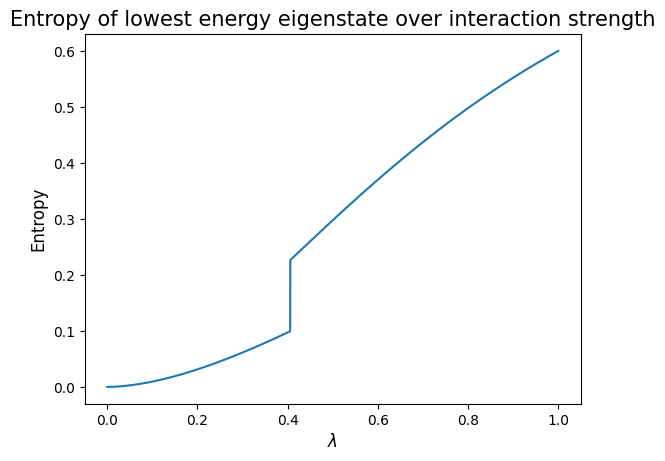

In [1]:
%matplotlib inline

""" This code is mainly taken from the lecture notes.
"""
from  matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import logm, expm
def log2M(a): # base 2 matrix logarithm
    return logm(a)/np.log(2.0)

dim = 4
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 4000
lmbd = np.linspace(0.0,1.0,n)
Hx = 2.0
Hz = 3.0
# Non-diagonal part as sigma_x tensor product with sigma_x
sx = np.matrix([[0,1],[1,0]])
sx2 = Hx*np.kron(sx, sx)
# Diagonal part as sigma_z tensor product with sigma_z
sz = np.matrix([[1,0],[0,-1]])
sz2 = Hz*np.kron(sz, sz)
noninteracting = [0.0, 2.5, 6.5, 7.0]
D = np.diag(noninteracting)
Eigenvalue = np.zeros((dim,n))
Entropy = np.zeros(n)

for i in range(n): 
    Hamiltonian = lmbd[i]*(sx2+sz2)+D
    if lmbd[i] == 1:
        print(Hamiltonian)
    if 0.4 < lmbd[i] < 0.42:
        print()
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    if 0.4 < lmbd[i] < 0.42:
        print("Eigvalues: ", EigValues)
        print("Eigvecotrs: ", EigVectors)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
    # Compute density matrix for selected system state, here ground state
    DensityMatrix = np.zeros((dim,dim))
    DensityMatrix = np.outer(EigVectors[:,0],EigVectors[:,0])
    if i == 1:
        print("Density Matrix",DensityMatrix)
        print("Eigenvectors", EigVectors)
    # Project down on substates and find density matrix for subsystem
    d = np.matrix([[1,0],[0,1]])
    v1 = [1.0,0.0]
    proj1 = np.kron(v1,d)
    
    x1 = proj1 @ DensityMatrix @ proj1.T
    v2 = [0.0,1.0]
    proj2 = np.kron(v2,d)
    x2 = proj2 @ DensityMatrix @ proj2.T
    # Total density matrix for subsystem
    total = x1+x2
    # von Neumann Entropy for subsystem 
    Entropy[i] = -np.matrix.trace(total @ log2M(total))
    # Plotting eigenvalues and entropy as functions of interaction strengths
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
    Eigenvalue[2,i] = EigValues[2]
    Eigenvalue[3,i] = EigValues[3]
print(proj1)
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.plot(lmbd, Eigenvalue[2,:] ,'r-',lmbd, Eigenvalue[3,:],'y-',)
plt.xlabel('$\lambda$', fontsize = 12)
plt.ylabel('Eigenvalues', fontsize = 12)
plt.title("Eigenvalues of two-qubit system over interaction strength", fontsize = 15)
plt.savefig("HdEigen")
plt.show()

plt.plot(lmbd, Entropy)
plt.xlabel('$\lambda$', fontsize = 12)
plt.ylabel('Entropy', fontsize = 12)  
plt.title("Entropy of lowest energy eigenstate over interaction strength", fontsize = 15)   
plt.savefig("HdEntropy")     
plt.show